# First data cleanup 

#### This code was used to identify the attention-passers. The final csv file includes people who:
- passed all attention checks
- reported realistic human dimensions, at least 100 pounds and an input less than or equal to "6" for feet and "12" for inches
- have the same response for both of the "age" questions

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
file_to_load = "prejudice_November 9.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file_to_load, encoding= 'unicode_escape')

In [4]:
# drop the first two rows and make random ID the index
df = df.drop([0, 1])
df = df.set_index("Random ID")

In [18]:
# convert "duration in seconds" to numeric 
df["Duration (in seconds)"] = pd.to_numeric(df["Duration (in seconds)"], errors='coerce')

# see if it worked
df["Duration (in seconds)"].dtypes

dtype('O')

In [50]:
# convert column values to numeric
cols = ['RWA_12', 'Turnover_4', 'AllyBarrier_5', 'Q101', 'Age', 'Height_1', 'Height_2', 'weight']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [52]:
df['weight'].describe()

count     334.000000
mean      130.648335
std        77.486325
min         2.000000
25%        80.000000
50%       134.000000
75%       165.000000
max      1000.000000
Name: weight, dtype: float64

In [32]:
# see which rows passes the attention check. We will compare later after we drop the attention non-passers
df['RWA_12'] == 3

Random ID
821159375    False
252075093    False
348920129    False
199625306    False
894003904    False
             ...  
485145293     True
912026072    False
347956039    False
264517343    False
624649606    False
Name: RWA_12, Length: 434, dtype: bool

In [67]:
# create a new dataframe with the following critera: 1) attention passers, spent more than 5 min on survey, have human
# dimensions, and answered both age questions correctly
df_passed = df[(df['RWA_12'] == 3) 
               & (df['Turnover_4'] == 6)
               & (df['AllyBarrier_5'] == 7)
               & (df['Q101'] == df['Age'])
               & (df['Duration (in seconds)'] > 300)
               & (df['Height_2'] <= 12)
               & (df['Height_1'] <= 6)
              & (df['weight'] >= 100)]

In [1]:
#df_passed

(array([104.,  36.,   8.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 306. ,  883.5, 1461. , 2038.5, 2616. , 3193.5, 3771. , 4348.5,
        4926. , 5503.5, 6081. ]),
 <a list of 10 Patch objects>)

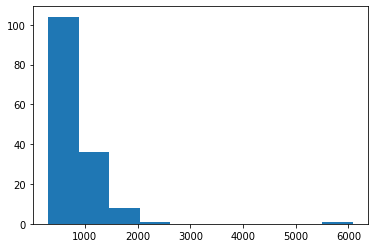

In [69]:
time = df_passed['Duration (in seconds)']
plt.hist(time)

In [60]:
time.describe()

count     152.000000
mean      806.032895
std       580.745826
min       306.000000
25%       509.500000
50%       636.000000
75%       962.500000
max      6081.000000
Name: Duration (in seconds), dtype: float64

In [61]:
df_passed.to_csv(r'/Users/fernandaw/Documents/CODE/COVID-PREJUDICE/prejudice_filtered.csv')